In [8]:
#%pip install matplotlib-label-lines

import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import seaborn
from labellines import labelLine, labelLines
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib
import Thermobar as pt

plt.rcParams["pdf.fonttype"]=42

plt.rcParams["font.size"] =10

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'


# Import fluid and melt inclusion data

In [9]:
mi18=pd.read_excel(os.path.join(os.getcwd(),"Literature data","Supplement_Wieser_et_al_G3.xlsx"),sheet_name="Melt_Inclusions")
# mi18.columns=mi18.iloc[7]
# mi18=mi18.iloc[8:111]
mi18['MagmaSat_err']=mi18['Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)']-mi18['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']
mi18['Depth (km)_ryanlerner']=pf.convert_pressure_to_depth(P_kbar=mi18['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']/1000,model='ryan_lerner')
fi18=pd.read_excel(os.path.join(os.getcwd(),"Literature data","GPL2404_TS-1-TS-7.xlsx"),sheet_name="Table S-1 Kīlauea FI")
fi18.columns=fi18.iloc[7]
fi18=fi18.iloc[8:110]
                                                            
fi23=pd.read_excel("S2_SI_Dataset_final.xlsx", sheet_name='TableS-1 Full data (Raman+EDS)', skiprows=[0, 2])

day1day2=pd.read_excel("S2_SI_Dataset_final.xlsx", sheet_name='TableS-2 All Raman analyses', skiprows=[0, 2])

day1=day1day2[day1day2['date'].str.contains('September 20')]
day2_og=day1day2[day1day2['date'].str.contains('September 21|September 20')]

fi23=fi23.drop(columns=fi23.filter(like='Unnamed'))
day1=day1.drop(columns=day1.filter(like='Unnamed'))
day2_og=day2_og.drop(columns=day2_og.filter(like='Unnamed'))

# ##############################################################################

display(day1.head())
display(day2_og.head())
display(fi23.head())


,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Crystal Name,FI Name,Reported density mean of reps?,Density g/cm3,"σ Density g/cm3 (as plotted, from DiadFit for individual, Std dev for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3 (DiadFit),σ Density g/cm3 (from Ne+peakfit),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_iteration5_min,XH2O_iteration5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_av,XH2O_iteration5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_max,XH2O_iteration5_max,P_mix_max/P_pureCO2
0,NaN,0,K23_101,K23_101_FIC,No,0.085665,0.007736,NaN,0.007736,0.006738,...,0.186487,0.283699,0.053569,1.053743,0.300597,0.107846,1.116509,0.318960,0.160045,1.184715
1,NaN,1,K23_101,K23_101_FID,No,0.100137,0.005037,NaN,0.005037,0.003301,...,0.160422,0.332672,0.046297,1.045784,0.349657,0.093476,1.099175,0.367821,0.138888,1.156277
2,NaN,2,K23_102,K23_102_FIA,No,0.112454,0.004482,NaN,0.004482,0.002350,...,0.141894,0.374628,0.041096,1.040210,0.391640,0.083402,1.087447,0.409664,0.124194,1.137491
3,NaN,3,K23_10,K23_10_FIA,No,0.131039,0.004066,NaN,0.004066,0.001310,...,0.123899,0.424947,0.035974,1.035015,0.442067,0.073697,1.076713,0.460070,0.110177,1.120562
4,NaN,4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,...,0.110034,0.474808,0.031950,1.030739,0.492191,0.066293,1.068475,0.510410,0.099630,1.108026


## Import glass data

In [10]:
gl20_23=pd.read_excel(os.path.join(os.getcwd(),'Literature data','Kilauea2020-2023_SamplesandChemistryDataRelease_Revision1_08272024.xlsx'),
                         sheet_name='Glass EPMA Data')
gl20_23.columns=gl20_23.iloc[1]
gl20_23=gl20_23.iloc[2:108]
gl23=gl20_23[gl20_23['Sample'].str.contains("KS23-597",na=False)]
gl23 = gl23.rename(columns={'FeO*': 'FeOt','SpotID':'Sample_ID'})

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)
    
gl23.to_excel(os.path.join(os.getcwd(),'Notebook_output','gl23_producedbyFig1_plotting.xlsx'), index=False)

### Calculate equilibrium olivine using Roeder 1970, Matzen 2011 and Putirka 2016 based on glass EPMA data and 18% Fe3+ (Lerner et al., 2021)

In [11]:
MG_input=pt.import_excel(os.path.join(os.getcwd(),'Notebook_output','gl23_producedbyFig1_plotting.xlsx'),
                         sheet_name='Sheet1', suffix="_Liq",sample_label="SpotID")
MG_all=MG_input['my_input'] ## All columns
MG_Liqs=MG_input['Liqs'] ## Just Liquid columns
display(MG_Liqs)

Eq_Ol_Matzen=pt.calculate_eq_ol_content(liq_comps=MG_Liqs,Fe3Fet_Liq=0.18,
                                                Kd_model="Matzen2011")
Eq_Ol_R70=pt.calculate_eq_ol_content(liq_comps=MG_Liqs,Fe3Fet_Liq=0.18,
                                                Kd_model="Roeder1970")
Eq_Ol_Put16=pt.calculate_eq_ol_content(liq_comps=MG_Liqs, Kd_model="Putirka2016",
                  Fe3Fet_Liq=0.18)
display(Eq_Ol_Matzen)
display(Eq_Ol_R70)
display(Eq_Ol_Put16)


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,50.368367,2.611423,13.639467,12.034600,0.172238,6.569447,10.527767,2.422803,0.524997,0.0,0.226016,0.0,0.0,0.0,0.0,0.0,KS23-597_gl2 Ave
1,50.385100,2.622263,13.753067,11.933567,0.177100,6.580063,10.410200,2.440890,0.482785,0.0,0.255591,0.0,0.0,0.0,0.0,0.0,KS23-597_gl3 Ave
2,50.945825,2.631235,13.784775,11.939700,0.179863,6.594385,10.586375,2.476973,0.476020,0.0,0.244366,0.0,0.0,0.0,0.0,0.0,KS23-597_gl4 Ave
3,50.975125,2.606120,13.884025,11.742100,0.165716,6.592375,10.548300,2.427175,0.478010,0.0,0.239454,0.0,0.0,0.0,0.0,0.0,KS23-597_gl5 Ave


c:\Users\charl\anaconda3\envs\py3115\Lib\site-packages\Thermobar\mineral_equilibrium.py:227: UserWarning: Putirka (2016) Kd models equation 8b and 9b are P-dependent you need to enter a P in kbar to get these outputs
  w.warn(


,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Matzen, Kd=0.34)","Eq Fo (Matzen, Kd=0.352)","Eq Fo (Matzen, Kd=0.328)"
0,0.542679,0.493170,0.777290,0.771227,0.783448
1,0.545171,0.495682,0.779024,0.772995,0.785147
2,0.545582,0.496097,0.779309,0.773286,0.785427
3,0.549641,0.500192,0.782114,0.776146,0.788175


,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)"
0,0.542679,0.493170,0.798204,0.782415,0.814643
1,0.545171,0.495682,0.799817,0.784120,0.816155
2,0.545582,0.496097,0.800082,0.784401,0.816404
3,0.549641,0.500192,0.802690,0.787159,0.818847


,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)"
0,0.542679,0.493170,0.782415,0.805792,0.760356,0.337822,0.778400,0.770397,0.802813,0.802813
1,0.545171,0.495682,0.784120,0.807359,0.762181,0.337898,0.780089,0.772169,0.804399,0.804399
2,0.545582,0.496097,0.784401,0.807617,0.762482,0.338851,0.779891,0.772461,0.804660,0.804660
3,0.549641,0.500192,0.787159,0.810150,0.765436,0.338995,0.782618,0.775328,0.807222,0.807222


# Plot Fig 3 base form

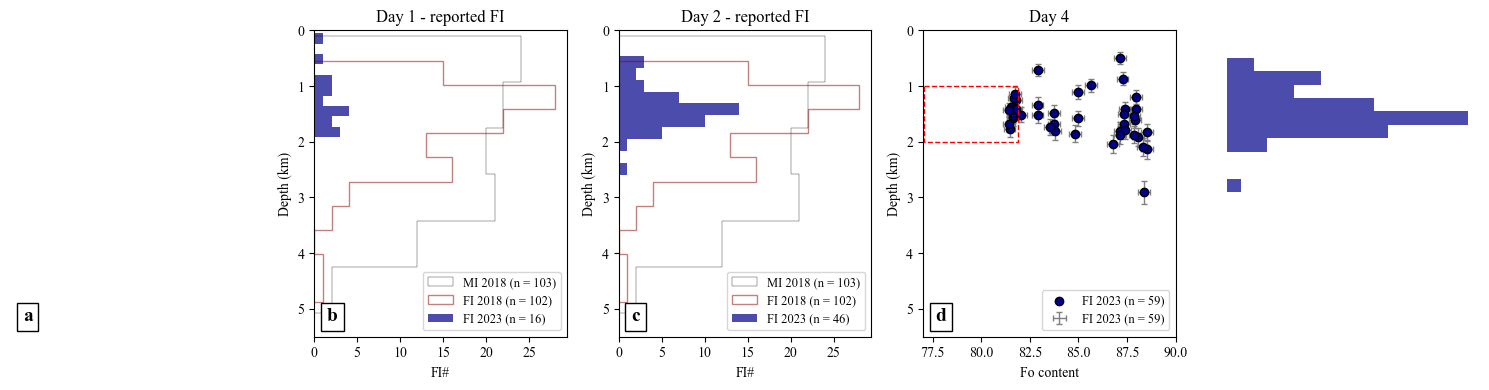

In [12]:
### Here we plot everything together

xmi18='Depth (km)_ryanlerner' #'Depth_RL(km)
xfi18='Single Fluid inclusion depth (km)'
xfi23_d1d2='Depth_km_ryanlerner'

# Filter for EOS (SO2 less than 5%)

fi23_filt=~(round(fi23['SO2_Diad_Ratio'],2)>0.22)

# Filter for day2 data
day2_og['SO2_Diad_Ratio']=day2_og['SO2_Diad_Ratio'].fillna(0)
day2=day2_og.copy()

degass_filt=day2['SO2_Diad_Ratio']<0.1

day2_out=day2[~(degass_filt)]
day2_in=day2[degass_filt]

figure_mosaic="""
ABCDE
"""

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(15, 4))
val_lim=[5.5, 0]
val_lim_abc=[0,5.5]


fontsize=9
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

orient='horizontal'

# plot MI and FI from 2018 on B,C,D

for ax in ['B','C']:
    axes[ax].hist(mi18[xmi18],bins=10,color='white',edgecolor='k',histtype='step',
                linewidth=0.25,label='MI 2018 (n = '+str(mi18.shape[0])+')', orientation=orient)

    axes[ax].hist(fi18[xfi18],bins=10,color='lightgrey',edgecolor='darkred', histtype='step',
                alpha=0.5, label='FI 2018 (n = '+str(fi18.shape[0])+')', orientation=orient)
    for ax in ['B','C','E']:
        if orient=='horizontal':
            axes[ax].set_ylim(val_lim)
            axes[ax].set_ylabel("Depth (km)")
            axes[ax].set_xlabel("FI#")
        else:
            axes[ax].set_xlim(val_lim_abc)
            axes[ax].set_xlabel("Depth (km)")
            axes[ax].set_ylabel("FI#")

# Plot day1 FI 2023

axes['B'].hist(day1[xfi23_d1d2],bins=10,color='darkblue',alpha=0.7, label='FI 2023 (n = '+str(day1.shape[0])+')', orientation=orient)

axes['C'].hist(day2_in[xfi23_d1d2],bins=10,color='darkblue',alpha=0.7, label='FI 2023 (n = '+str(day2_in.shape[0])+')', orientation=orient)
# axes['C'].hist(day2_out[xfi23_d1d2],bins=10,color='pink',alpha=0.7, label='FI 2023 filtered (n = '+str(day2_out.shape[0])+')', orientation=orient)

###Day 4

Fo_var_fi23='Fo'

fi_data_col='Mean_MC_D_km'
fi_err_col='std_dev_MC_D_km'

## This actually plots data

axes['D'].errorbar(fi23[fi23_filt][Fo_var_fi23]*100, fi23[fi23_filt][fi_data_col], xerr=0.003*100,
                    yerr=fi23[fi23_filt][fi_err_col], 
                    color='grey', 
                    alpha=1,markeredgecolor=None,marker='', ls='none', 
                    barsabove=False, elinewidth=1, capsize=2,zorder=-2,
                    label='FI 2023 (n = '+str(fi23[fi23_filt].shape[0])+')')

axes['D'].scatter(fi23[fi23_filt][Fo_var_fi23]*100, fi23[fi23_filt][fi_data_col],
            marker='o', edgecolor='k',color='darkblue',label='FI 2023 (n = '+str(fi23[fi23_filt].shape[0])+')')

axes['E'].hist(fi23[fi23_filt][fi_data_col],alpha=0.7,density=1,orientation=orient,color='darkblue', bins=10)
axes['D'].set_ylim(val_lim)
axes['D'].set_ylabel("Depth (km)")
axes['D'].set_xlabel("Fo content")
axes['D'].set_xlim([77,90])

axes['E'].set_axis_off()
#### PLOT SETTINGS ######################################################
subplot_labels = ['A','B','C','D',]
pos_a2h=(0.05,0.05)
label_positions = [pos_a2h,pos_a2h,pos_a2h,pos_a2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)

### SAVE FIG##############################################################
axes['B'].set_title("Day 1 - reported FI")
axes['C'].set_title("Day 2 - reported FI")
axes['D'].set_title("Day 4")

# Calculated equilibrium Fo range from EPMA glass data and 18% Fe3+ (Lerner et al., 2021)
x_min = 77.04
x_max = 81.88

# Define the y-range for the box
y_min = 1
y_max = 2

# Create a box using a Rectangle patch
box = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='red', linestyle='dashed')
# axes['D'].plot([87,87],[5,0])
# Add the box to the subplot
axes['D'].add_patch(box)

for ax in ['B','C','D']:
    axes[ax].legend(loc='lower right',fontsize=fontsize)
axes['A'].set_axis_off()
plt.tight_layout()

plt.rcParams["pdf.fonttype"]=42

# fig.savefig(os.getcwd()+'/'+"Fig3_base.pdf")
directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', f'Fig1_base_updated.pdf'))
